In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set IDs to test
dataset_ids = { 
    'Fashion': 40996,  # Fashion
    'Adult': 1590,   # adult
    'Higgs': 4532,   # higgs
    'Jasmine': 41143,  # jasmine
    'Vehicle': 54,     # vehicle
    'Volkert': 41166   # volkert
}


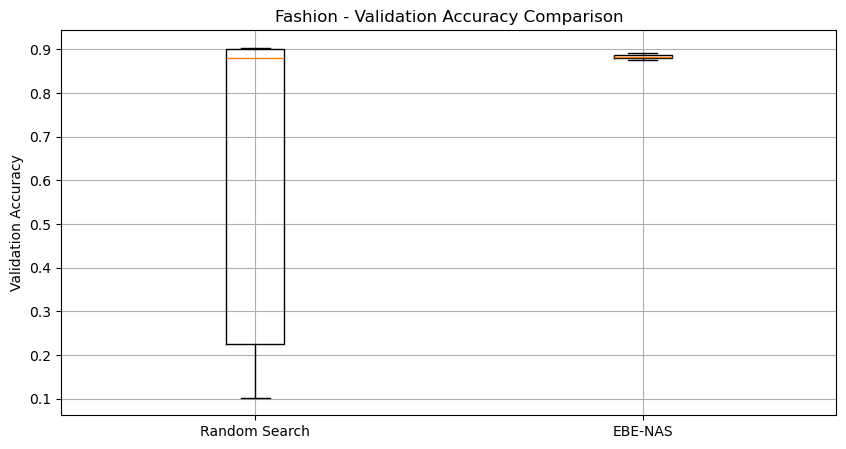

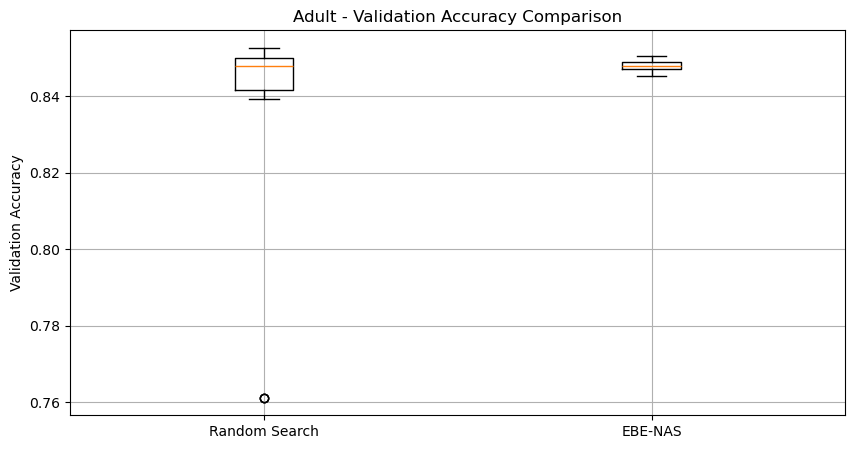

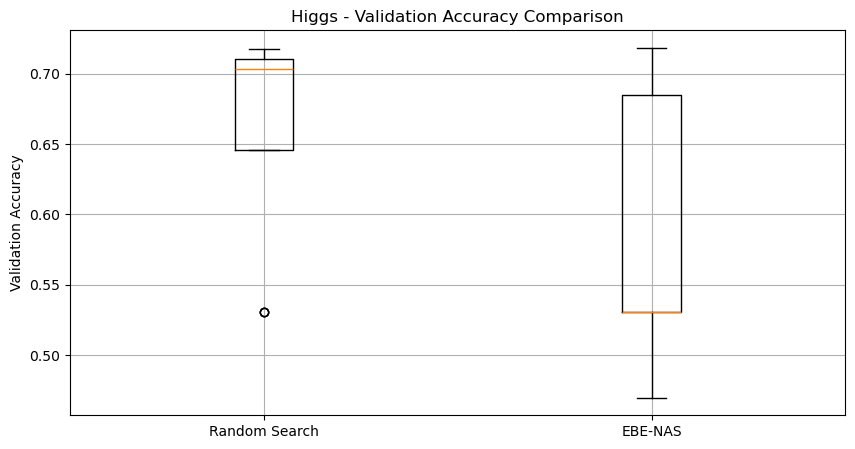

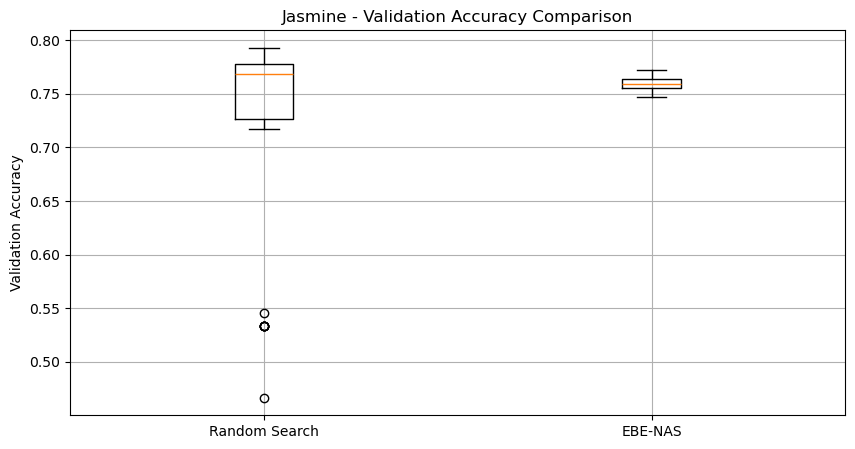

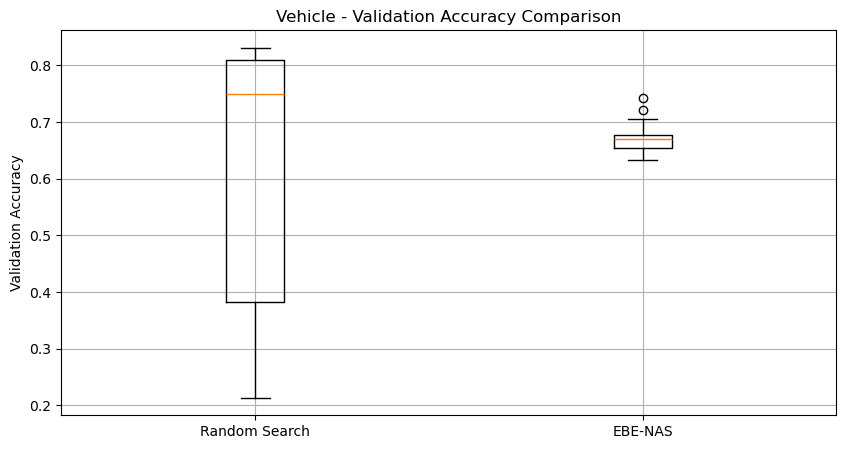

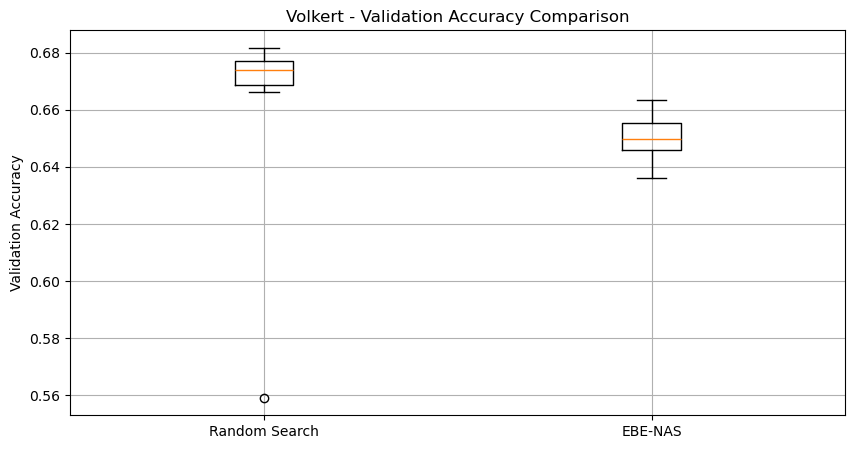

In [ ]:
ebe_results = pd.read_csv('../Epoch-Based Evolution (EBE)/EBE-NAS_LCBench_results.csv')
rsearch_results = pd.read_csv('random_search_results.csv')


for dataset_name, dataset_id in dataset_ids.items():
    ebe_dataset = ebe_results[ebe_results['dataset_id'] == dataset_id].copy()
    # Only care about the last epoch best models
    ebe_dataset = ebe_dataset[ebe_dataset['epoch'] == max(ebe_dataset['epoch'])].sort_values('val_acc', ascending=False)
    
    rsearch_dataset = rsearch_results[rsearch_results['dataset'] == dataset_name].copy()

     # Extract val_acc from both methods
    ebe_acc = ebe_dataset['val_acc'].values
    rsearch_acc = rsearch_dataset['val_acc'].values

    # Create boxplot
    plt.figure(figsize=(10, 5))
    plt.boxplot([rsearch_acc, ebe_acc], tick_labels=['Random Search', 'EBE-NAS'])
    plt.title(f'{dataset_name} - Validation Accuracy Comparison')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.show()



# Same N of Models, trained by ES

In [4]:
ID_TO_TEST = 41166

ebe_full_trained = pd.read_csv('./models_ES_training_results.csv')

In [5]:
ebe_full_trained

,index,dataset_id,train_loss,train_acc,val_loss,val_acc,training_time_sec,hidden_layers,activation_fn,dropout_rate,learning_rate,batch_size,optimizer_type
0,0,Fashion,0.029027,0.990156,0.705195,0.901071,45.285370,"[459, 188]",type,0.0,0.001531,256,Adam
1,1,Fashion,0.027192,0.991295,0.910727,0.900268,56.335438,"[352, 183]",type,0.0,0.005057,1024,Adam
2,2,Fashion,0.069052,0.976585,0.612471,0.902946,99.657637,"[448, 102, 504]",type,0.1,0.001631,128,Adam
3,3,Fashion,0.021773,0.992589,0.906587,0.897411,90.971412,"[120, 110, 469]",type,0.0,0.001268,128,Adam
4,4,Fashion,0.086358,0.967946,0.481688,0.902321,41.153625,"[290, 108]",type,0.1,0.004837,1024,Adam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,3,Volkert,0.622901,0.771906,0.999989,0.671490,25.423982,"[346, 298]",type,0.0,0.004188,256,Adam
101,4,Volkert,0.649043,0.763948,0.940376,0.684887,27.018533,"[488, 351]",type,0.1,0.003112,256,Adam
102,5,Volkert,0.615482,0.773862,1.002212,0.675241,26.678181,"[253, 153, 149]",type,0.0,0.005323,512,Adam
103,6,Volkert,0.447425,0.836192,1.082992,0.685531,44.677623,"[432, 304, 462, 192, 140]",type,0.0,0.001553,128,Adam


In [19]:
plt.style.use('dark_background')

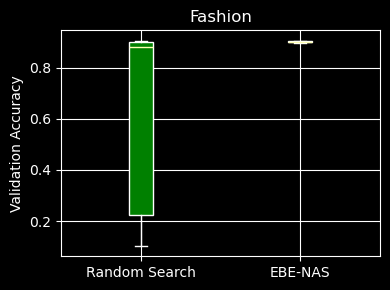

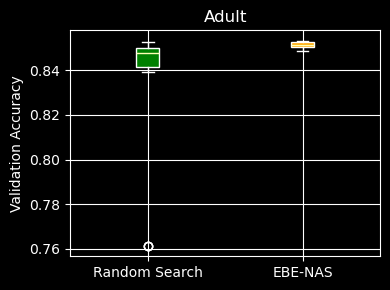

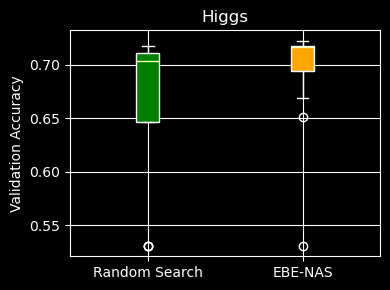

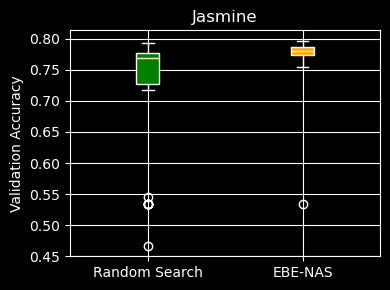

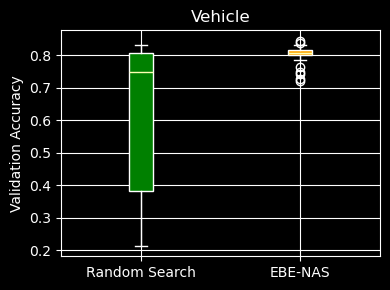

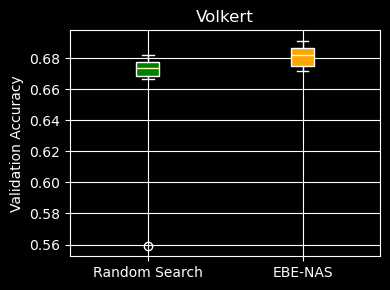

In [32]:

# Set up the figure with subplots
n_datasets = len(dataset_ids)

# Define colors
colors = ['green', 'orange']  # Random Search, EBE-NAS

# Plot each dataset's boxplot in a separate figure
for dataset_name, dataset_id in dataset_ids.items():
    ebe_dataset = ebe_full_trained[ebe_full_trained['dataset_id'] == dataset_name].copy()
    rsearch_dataset = rsearch_results[rsearch_results['dataset'] == dataset_name].copy()

    # Extract val_acc from both methods
    ebe_acc = ebe_dataset['val_acc'].values
    rsearch_acc = rsearch_dataset['val_acc'].values

    # Create a new figure
    fig, ax = plt.subplots(figsize=(4, 3))

    # Create boxplot
    box = ax.boxplot([rsearch_acc, ebe_acc],
                     patch_artist=True,
                     tick_labels=['Random Search', 'EBE-NAS'])

    # Set colors
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_title(f'{dataset_name}')
    ax.set_ylabel('Validation Accuracy')
    ax.grid(True)

    plt.tight_layout()
    plt.show()
